# Demonstration of cross-validation

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Import packages

In [2]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import gstlearn as gl
import gstlearn.plot as gp

## Introduction

This is a small script which illustrates the capabilities of the cross-validation feature within *gstlearn*.

We generate a fictitious data set (by sampling a given simulation). Then we will use this fictitious data set to demonstrate the cross-validation tool.

We generate a data set composed of a series of 10 samples located randomly within a 100 by 100 square. The number of data is voluntarily small in order to make the results more legible.

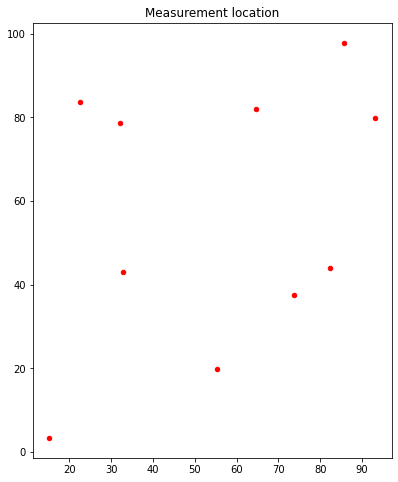

In [3]:
nech = 10
data = gl.Db.createFromBox(nech, [0,0], [100,100])
ax = data.plot()
ax.decoration(title="Measurement location")

We define a model (spherical structure with range 30 and sill 4) with the Universality condition, and perform a non conditional simulation at the data locations. These values, renamed as *data* will now become the data set.

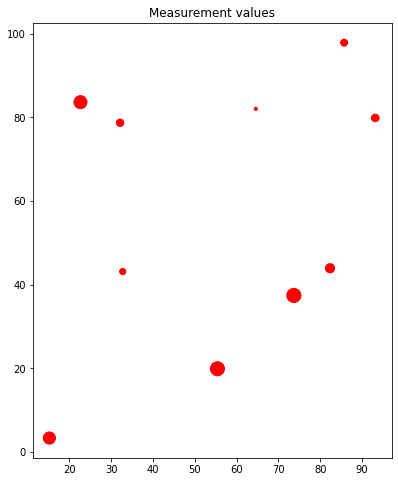

In [4]:
model = gl.Model.createFromParam(type=gl.ECov.SPHERICAL,range=30,sill=4)
model.setDriftIRF(0)
err = gl.simtub(None,data,model)
data.setName("Simu","data")
data
ax = data.plot()
ax.decoration(title="Measurement values")

Now we perform the cross-validation step. This requires the definition of a neighborhood (called *neigh*) that we consider as unique, due to the small neumber of data. Obviously this could be turned into a moving neighborhood if necessary.

In [5]:
neighU = gl.NeighUnique()
err = gl.xvalid(data,model,neighU,flag_xvalid_est=1,flag_xvalid_std=1,
                namconv=gl.NamingConvention("Xvalid",True,True,False))

Unique valdat=2.501800 estim=0.550123 stdv=1.782378
 Unique valdat=1.265629 estim=1.737467 stdv=1.791230
 Unique valdat=2.184290 estim=0.209244 stdv=2.132139
 Unique valdat=-2.916651 estim=0.990594 stdv=2.123964
 Unique valdat=0.870322 estim=0.196095 stdv=2.064367
 Unique valdat=-0.730454 estim=0.613757 stdv=2.059143
 Unique valdat=2.955421 estim=0.640729 stdv=1.782629
 Unique valdat=-0.573139 estim=0.585646 stdv=2.132139
 Unique valdat=0.823638 estim=1.477347 stdv=1.782378
 Unique valdat=-0.156543 estim=0.496586 stdv=2.125758
 

The cross-validation feature offers several types of outputs, according to the flags:

- *flag_xvalid_est* tells if the function must return the estimation error Z*-Z (flag.est=1) or the estimation Z* (flag.est=-1)

- *flag_xvalid_std* tells if the function must return the normalized error (Z*-Z)/S (flag.std=1) or the standard deviation S (flag.std=-1)

For a complete demonstration, all options are used. Note the use of *NamingConvention*  which explicitely leaves the Z-locator on the input variable (i.e. *data*).

We perform the Cross-validation step once more but change the storing option (as wellas the radix given to the output variables).

In [6]:
err = gl.xvalid(data,model,neighU,flag_xvalid_est=-1, flag_xvalid_std=-1,
                namconv=gl.NamingConvention("Xvalid2",True,True,False))

Unique valdat=2.501800 estim=0.550123 stdv=1.782378
 Unique valdat=1.265629 estim=1.737467 stdv=1.791230
 Unique valdat=2.184290 estim=0.209244 stdv=2.132139
 Unique valdat=-2.916651 estim=0.990594 stdv=2.123964
 Unique valdat=0.870322 estim=0.196095 stdv=2.064367
 Unique valdat=-0.730454 estim=0.613757 stdv=2.059143
 Unique valdat=2.955421 estim=0.640729 stdv=1.782629
 Unique valdat=-0.573139 estim=0.585646 stdv=2.132139
 Unique valdat=0.823638 estim=1.477347 stdv=1.782378
 Unique valdat=-0.156543 estim=0.496586 stdv=2.125758
 

In [7]:
data


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 8
Maximum Number of UIDs       = 8
Total number of samples      = 10

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x-1 - Locator = x1
Column = 2 - Name = x-2 - Locator = x2
Column = 3 - Name = data - Locator = z1
Column = 4 - Name = Xvalid.data.esterr - Locator = NA
Column = 5 - Name = Xvalid.data.stderr - Locator = NA
Column = 6 - Name = Xvalid2.data.estim - Locator = NA
Column = 7 - Name = Xvalid2.data.stdev - Locator = NA

We know check all the results gathered on the first sample.

In [8]:
data[0,0:8]

array([ 1.        , 22.70134452, 83.64117505,  2.50180018, -1.95167723,
       -1.09498517,  0.55012296,  1.78237778])

The printed values correspond to the following information:

- the sample rank: 1
- the sample abscissae $X$: 22.7
- the sample coordinate $Y$: 83.64
- the data value $Z$: 2.502
- the cross-validation error $Z^* - Z$: -1.952
- the cross-validation standardized error $\frac{Z^* - Z} {S}$: -2.499
- the cross-validation estimated value $Z^*$: 0.550
- the standard deviation of the cross-validation error $S$: 1.781

In [12]:
1.952/1.781

1.0960134755755193

We can also double-check these results by asking a full dump of all information when processing the first sample. The next chunk does not store any result: it is just there in order to produce some output on the terminal to better understand the process.

In [9]:
gl.OptDbg.setReference(1)
err = gl.xvalid(data,model,neighU,flag_xvalid_est=1, flag_xvalid_std=1,
                namconv=gl.NamingConvention("Xvalid3",True,True,False))


 Target location
 ---------------
 Sample #1 (from 10)
 Coordinate #1 = 22.701345
 Coordinate #2 = 83.641175
 
 Data selected in neighborhood
 -----------------------------
        Rank      Sample          x1          x2 
           1           1      22.701      83.641 
           2           2      82.323      43.955 
           3           3      15.270       3.385 
           4           4      55.428      19.935 
           5           5      93.142      79.864 
           6           6      85.694      97.845 
           7           7      73.690      37.455 
           8           8      32.792      43.164 
           9           9      32.178      78.710 
          10          10      64.591      82.042 
 
 LHS of Kriging matrix (compressed)
 Number of active samples    = 10
 Total number of equations   = 11
 Reduced number of equations = 11
 
        Rank                       1           2           3           4           5 
                    Flag           1           2

We can check that:

- the cross-validation system is dimensionned to 40. As a matter of fact, in Unique Neighborhood, the kriging system is established with the whole data set. The one suppressing one datum in turn is derived using the Schur theorem.

- the results recall the values for the true data value (-0.326), the estimated value (-2.084), the standard deviation of the estimation error (1.623) and finally the cross-validation estimation error (-1.758).

We can also double-check these calculations with a Moving Neighborhood which has been tuned to cover a pseudo-Unique Neighborhood.

In [10]:
neighM = gl.NeighMoving.create()

In [11]:
gl.OptDbg.setReference(1)
err = gl.xvalid(data,model,neighM,flag_xvalid_est=1, flag_xvalid_std=1,
                namconv=gl.NamingConvention("Xvalid4",True,True,False))


 Target location
 ---------------
 Sample #1 (from 10)
 Coordinate #1 = 22.701345
 Coordinate #2 = 83.641175
 
 Data selected in neighborhood
 -----------------------------
        Rank      Sample          x1          x2      Sector 
           1           2      82.323      43.955           1 
           2           3      15.270       3.385           1 
           3           4      55.428      19.935           1 
           4           5      93.142      79.864           1 
           5           6      85.694      97.845           1 
           6           7      73.690      37.455           1 
           7           8      32.792      43.164           1 
           8           9      32.178      78.710           1 
           9          10      64.591      82.042           1 
 
 LHS of Kriging matrix (compressed)
 Number of active samples    = 9
 Total number of equations   = 10
 Reduced number of equations = 10
 
        Rank                       1           2           3     

In the next paragraph, we perform the different graphic outputs that are expected after a cross-validation step. They are provided by the function *draw.xvalid* which produces:

- the base map of the absolute value of the cross-validation standardized error
- the histogram of the cross-validation standardized error
- the scatter plot of the standardized error as a function of the estimation
- the scatter plot of the true value as a function of the estimation

data = db.locerase(data,"z")
data = db.locate(data,"data","z")
draw.xvalid(data,mode=1)
draw.xvalid(data,mode=2)
draw.xvalid(data,mode=3)
draw.xvalid(data,mode=4,name.data="data")